<a href="https://colab.research.google.com/github/Bommisrilekkhaa/ML/blob/main/Ridge%26lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since model overfits , we go for
##regularization

---> types:

#Ridge

--> L2 regularization (circle shape) error never comes to zero, bcoz of squaring the values

--> adding penalty term with error (squared coefficient)

--> L_ridge(B) = sum(yi - xi' * B)^2 + lambda * sum(wj * Bj^2)

--> lambda - penalty term

--> LS obj + alpha * (sum of squares of co-eff)

#Lasso

--> L1 regularization (diamond shape) error sometimes reach zero

--> adding penalty term with error (absolute coefficient)

--> L_lasso(B) = sum(yi - xi' * B)^2 + lambda * sum(abs(Bj))

--> LS obj + alpha * (sum of absolute of co-eff)


------> Ridge vs Lasso---> Lasso is better




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([2.1,3.8,6.5,9.2,11.3])

In [ ]:
#design matrix
x_b = np.c_[np.ones([x.shape[0],1]),x]
x_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [ ]:
alpha_ridge = 1.0
alpha_lasso = 0.1
num_iteration = 1000
learning_rate = 0.01

In [ ]:
#theta = weights

def lasso_regression(x, y, alpha,num_iteration,learning_rate):
  m,n = x.shape
  theta = np.zeros(n)
  for _ in range(num_iteration):
    y_pred = x.dot(theta)
    gradient = (x.T.dot(y_pred - y) + alpha * np.sign(theta)) / m
    theta -= learning_rate * gradient
  return theta

In [ ]:
#theta = weights
#if we squared theta means also we get same output,so we didnt square here
def ridge_regression(x, y, alpha,num_iteration,learning_rate):
  m,n = x.shape
  theta = np.zeros(n)
  for _ in range(num_iteration):
    y_pred = x.dot(theta)
    gradient = (x.T.dot(y_pred - y) + alpha * theta) / m
    theta -= learning_rate * gradient
  return theta

In [ ]:
theta_ridge = ridge_regression(x_b, y, alpha_ridge, num_iteration, learning_rate)
theta_lasso = lasso_regression(x_b, y, alpha_lasso, num_iteration, learning_rate)

In [ ]:
print(theta_ridge)
print(theta_lasso)

[0.05700254 2.17211411]
[-0.27352287  2.29942818]


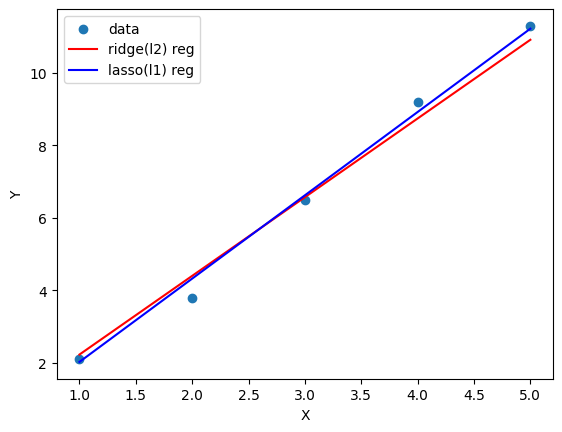

In [ ]:
plt.scatter(x,y,label='data')
plt.plot(x,x_b.dot(theta_ridge),label='ridge(l2) reg',color='r')
plt.plot(x,x_b.dot(theta_lasso),label='lasso(l1) reg',color='b')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ezioauditore-tech/AI/main/datasets/auto-mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000
